# Quantum Computing
***
Quantum computing is a quantum mechanics application that allows you to perform computations. Data is stored using quantum bits, commonly called "qubits". They can be in either a **0** or **1** state or both simultaneously, a condition known as "superposition."

Specific problems can be solved faster than in classical computers that use transistors and electrons.

Unlike classical computers, qubits can be entangled, influencing each other's state, and can be entangled over large distances; this can reduce the complexity of certain problem types, making quantum computers faster than classical computers.

***
## 1. Flipping a Coin
Due to their reliance on quantum phenomena, quantum computers are not deterministic but rather probabilistic in nature.

In classical computers, a coin flip can be represented by two outcomes: heads, representing **1**, or tails, representing **0**.

The probability of getting heads or tails is 50%.

However, in quantum computing, it's not so simple; the outcome isn't limited to **1** or **0**, and it can have a probability of anything from 0% to 100%, this is because qubits can be in a hybrid position.

***
### Binomial Distribution
The binomial distribution is a type of probability distribution that describes the results of a series of independent binary events.

The outcome of a coin flip is binary, with either heads or tails having a 50% chance of occurring.

A binomial distribution is used to calculate the probability of getting heads or tails in a row during an array of coin flips.

### Flipping Two Coins 1 Million Times

Probability table:
<table align="left">
    <tr><td></td><td>Heads</td><td>Tails</td><tr>
    <tr><td>Heads</td><td>0.25</td><td>0.5</td><tr>
    <tr><td>Tails</td><td>0.5</td><td>0.25</td><tr>
</table>

<!-- Jupyter bug? -->
<br><br><br><br><br>

Possible outcomes:
1. Heads, Heads
2. Heads, Tails
3. Tails, Heads
4. Tails, Tails

Explanations:
1. The chance of the two coins being different is $50$% because two of the four possible outcomes are different.
2. The chance of both coins being heads is $25$% because only one of the four possible outcomes has both heads.
3. The chance of both coins being tails is $25$% because only one of the four possible outcomes has both tails.

The Python code below will flip two coins one million times and plot the binary distribution using matplotlib.

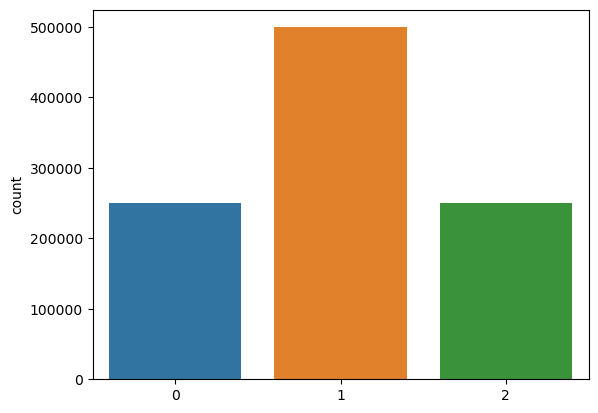

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flip 2 coins 1 million times each coin flip having a probability of 0.5.
two_coin_flips = np.random.binomial(2, 0.5, 1_000_000)

# Create a count plot showing the distribution of the coin flips.
sns.countplot(x=two_coin_flips)
plt.show()

### Flipping Three Coins 1 Million Times

Similar to the Python code above, this time three coins will be flipped.

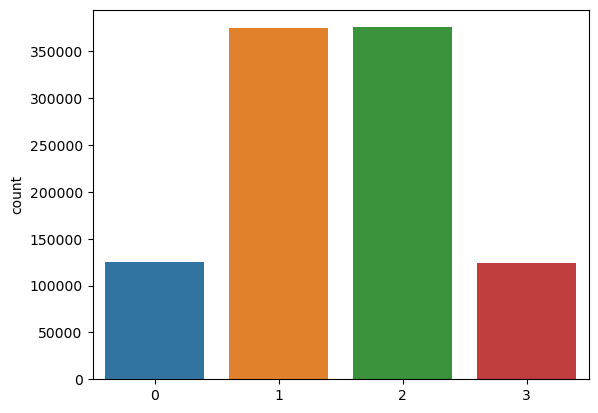

In [2]:
# Flip 3 coins 1 million times each coin flip having a probability of 0.5.
three_coin_flips = np.random.binomial(3, 0.5, 1_000_000)

# Create a count plot showing the distribution of the coin flips.
sns.countplot(x=three_coin_flips)
plt.show()

### Flipping Forty Coins 1 Million Times

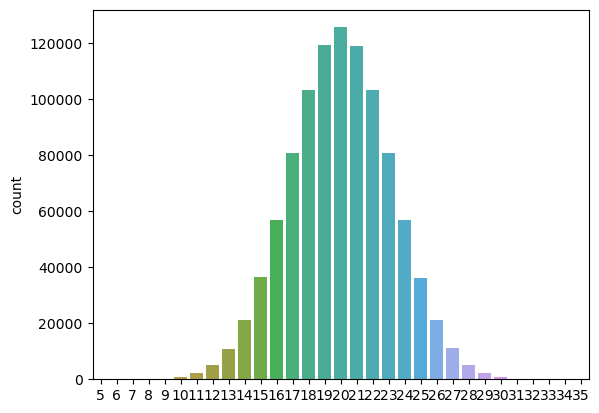

In [3]:
# Flip 40 coins 1 million times each coin flip having a probability of 0.5.
forty_coin_flips = np.random.binomial(40, 0.5, 1_000_000)

# Create a count plot showing the distribution of the coin flips.
sns.countplot(x=forty_coin_flips)
plt.show()

***
## 2. Qiskit

In this notebook, I will be using Qiskit, a library for Python created by IBM, to aid in the creation of quantum circuits. Alternatives do exist; Cirq is similar in functionality and was created by Google.

Qiskit also includes a simulator for running your quantum circuits called "Aer", but this isn't of much use because it doesn't provide the speed that actual quantum computers can give you and it is deterministic, unlike actual quantum computers, which are probabilistic.

In [4]:
try:
    # Try and import qiskit.
    import qiskit
except ImportError:
    # If it doesn't import, install qiskit using pip.
    !pip install qiskit

***
## 3. Qubit
A qubit, short for a quantum bit, analogue to a bit in classical computers. In the quantum world, it is the fundamental medium for information transmission.

A qubit can only be **0** or **1** when it is not in a superposition. The states of qubits can be represented by a vector in a two-dimensional complex vector space.

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

### Superposition
Alternatively, the qubit can be in a state of both **0** and **1**.
This is known as quantum superposition.

They are commonly visually depicted as "Bloch spheres" (as shown below).
with the north pole representing an absolute **0** and the south pole representing **1**.

The state of the Bloch sphere below is an equal superposition of $|0\rangle$ and $|1\rangle$.

In [5]:
# Try and import qutip
try: import qutip
# If it doesn't import, install qutip using pip
except ImportError:
    !pip install qutip

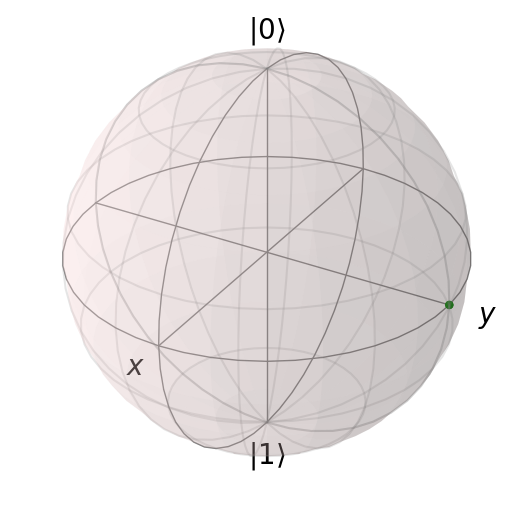

In [6]:
# Create new Bloch object.
qubit_bloch = qutip.Bloch()

# Set point colour to green.
qubit_bloch.point_color = ['g']

# Position of point on sphere |0> + |1>
qubit_bloch.add_points([0, 1, 0])
qubit_bloch.show()

***
## 4. Quantum Logic Gates
Similar to logic gates in classical computers, quantum logic gates are used to manipulate the state of the qubits.

Unlike classical computers, quantum logic gates perform unitary operations. I will describe each gate and the matrix operations it represents.

### Kronecker Product

The operations of all gates below, except the $CNOT$ and $SWAP$ gates, can be represented using the Kronecker product.

In quantum computing, two matrices are combined using the Kronecker product, which in this context would be the qubit and the matrix that represents the operation. You start by taking each element of the first matrix and then multiplying it with the elements of the second matrix. Put the product of the calculation into a new matrix, which is the result of the operation.

In this example, I will be applying the Pauli X gate
$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
on the qubit $|1\rangle
$.

$X \otimes |1\rangle$

= $X \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$

= $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

= $\begin{bmatrix} 0 \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 
1 \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{bmatrix}$

= $\begin{bmatrix} 0 \\ 1 \end{bmatrix} = |0\rangle$

***
### Identity Gate

The identity gate leaves the state of the qubit unchanged. It does not perform any actions on the qubit.

$
Identity =
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$

### Pauli X Gate / NOT Gate

The Pauli X gate also commonly known as the NOT gate,
performs a NOT operation, flipping the state of the qubit


$|0\rangle => |1\rangle$ and $|1\rangle => |0\rangle$

$
X =
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$

### Pauli Y gate
The Pauli Y gate rotates the state of a qubit by 𝜋 radians around the Y axis, which is equivalent to a 360-degree turn.

$
Y =
\begin{bmatrix} 0 & -i \\ -i & 0 \end{bmatrix}
$

### Pauli Z Gate
The Pauli Z gate rotates the state of a qubit by $\pi$ radians around the Z axis, which is equivalent to a 360-degree turn.

$
Z =
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$

### Hadamard Gate
If you apply the Hadamard gate to a qubit, it will be put into a superposition state with equal probabilities of measuring 0 and 1 when measured. This means that there is a 50% chance of measuring 0 and a 50% chance of measuring a 1.

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$

## CNOT Gate
The controlled-NOT gate is a quantum gate that flips the state of the second qubit (see NOT gate above), but only if the first qubit is in the $|1\rangle$ state. The controlled-NOT gate is also known as the CNOT gate.

$
CNOT =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$

## SWAP Gate
The SWAP gate is a three-qubit quantum gate that swaps the states of qubits 1 and 2, while leaving qubit 3 unchanged.

$
SWAP =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$

# 5. Quantum Circuit
With Qiskit, you describe the quantum circuits in Python; these can then be converted into a form that can be run on an actual quantum computer or in the Aer simulator, but this lacks the quantum uncertainty that actual quantum computers have.

In the example below, I am generating 5 quantum circuits, each taking one quantum bit and one classical bit.
Each circuit will contain a single gate from the list (H, X, Y, Z, T).

In [7]:
def append_circuits(circuit_list):
    """ Since the __add__ method is deprecated
    This function will append a list of circuits together """
    import functools
    compose_func = lambda i, j: i.compose(j)
    
    # Perform reduce operation, execute .compose on each circuit
    return functools.reduce(compose_func, circuit_list)

In [8]:
quantum_gates = [
    qiskit.QuantumCircuit.h, qiskit.QuantumCircuit.x, qiskit.QuantumCircuit.y,
    qiskit.QuantumCircuit.z, qiskit.QuantumCircuit.t
]

# Where our newly generated circuits will go
quantum_circuits = []

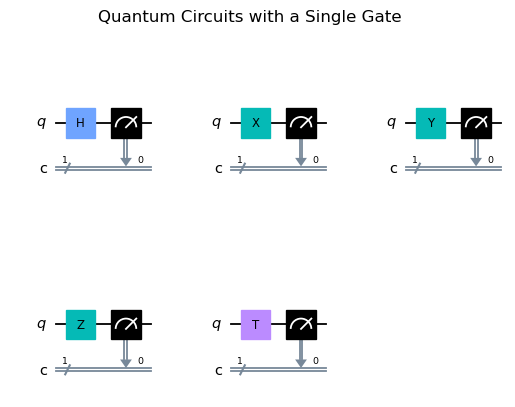

In [9]:
fig = plt.figure() # This figure will contain the circuit diagram.

# Iterate through the quantum gates
for i, current_gate in enumerate(quantum_gates):
    circuit = qiskit.QuantumCircuit(1, 1) # Quantum circuit with 1 quantum and 1 classical bit.
    quantum_circuits += [circuit] # Append it to the list of quantum circuits.
    
    # Add the current gate and measure qubit 0.
    current_gate(circuit, 0)
    circuit.measure(0, 0)

    # Add each subplot to the figure.
    ax = fig.add_subplot(2, 3, i + 1)
    circuit.draw(output="mpl", ax=ax)

# Show the entire plot with a title.
plt.suptitle("Quantum Circuits with a Single Gate")
plt.show()

Now that the circuits have been generated, going to simulate each one with a qubit $|0\rangle$ and then a $|1\rangle$, first plot will be with $|0\rangle$.

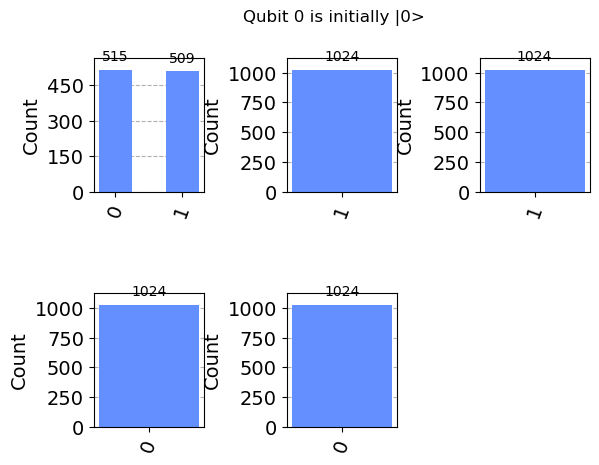

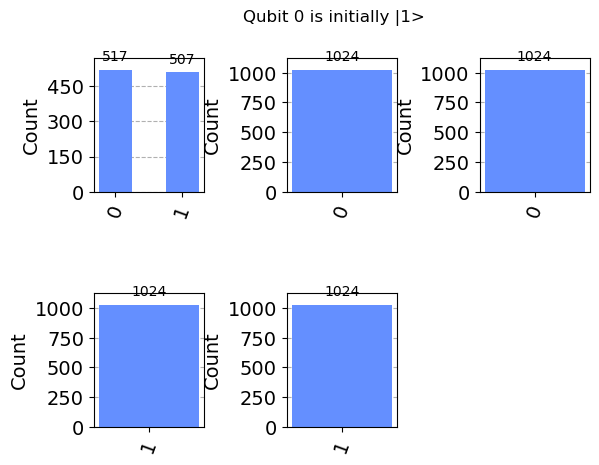

In [10]:
import qiskit.visualization as viz

# This circuit will set the qubit 0 to |0>
zero_circuit = qiskit.QuantumCircuit(1, 1)
zero_circuit.initialize([1, 0], [0])

# This circuit will set the qubit 0 to |1>
one_circuit = qiskit.QuantumCircuit(1, 1)
one_circuit.initialize([0, 1], [0])

aer_simulator = qiskit.Aer.get_backend("aer_simulator")

for init_circuit, plot_name in [(zero_circuit, "Qubit 0 is initially |0>"),
                                   (one_circuit, "Qubit 0 is initially |1>")]:
    fig = plt.figure() # This figure will contain the circuit diagram.
    fig.subplots_adjust(wspace=0.75, hspace=0.75) # Space out the histograms
    
    for i, single_gate_circuit in enumerate(quantum_circuits):
        # Initialisation circuit from above and single gate circuit
        new_circuit = append_circuits([init_circuit, single_gate_circuit])
        
        # Simulate the circuit.
        result = aer_simulator.run(new_circuit).result().get_counts()

        ax = fig.add_subplot(2, 3, i + 1) # Add each subplot to the figure.
        viz.plot_histogram(result, ax=ax) # Plot each histogram
        
    # Show the entire plot
    plt.suptitle(plot_name)

The gates used in the circuits above only take a single qubit as input, below I will include an example of a circuit that takes 2 qubits and 2 classical bits.

This circuit begins by using the Hadamard gate to put qubit 0 into a superposition, then the CNOT gate will flip the qubit in 1 if the qubit in 0 is in a $|1\rangle$ state.

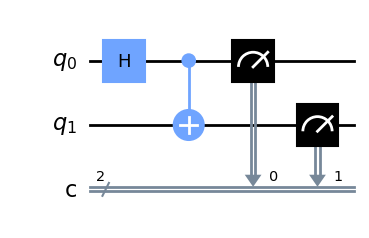

In [11]:
# Create a new circuit, 2 quantum bits and 2 classical.
circuit = qiskit.QuantumCircuit(2, 2)

# Appling Hadamard will put qubit 0 into superposition.
circuit.h(0)

# Add controlled not, as explained in the quantum gates section above
# Will only flip the qubit in qubit 1, if qubit 0 is |1>.
circuit.cnot(0, 1)

# Measure should be 50%, due to Hadamard.
circuit.measure((0, 1), (0, 1))

# Draw the circuit.
circuit.draw(output="mpl")

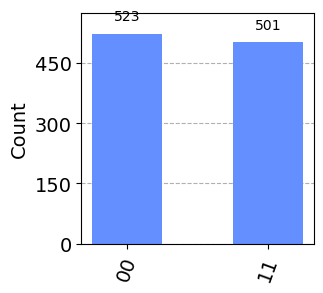

In [12]:
# Simulate the circuit above.
result = aer_simulator.run(circuit).result().get_counts()

# Histogram should show a 50:50 between 00 and 11.
viz.plot_histogram(result, figsize=(3, 3))

***
## 6. Deutsch’s Algorithm
Deutsch's algorithm is a quantum algorithm designed by David Deutsch in 1985, it is an example of how quantum computers are superior to classical computers. It is used to determine if an oracle/function is balanced or constant.

A classical computer would have to pass more than half the possible inputs in order to determine if the function is constant or balanced, but a quantum computer can do it in one go!

1. Constant: Returns the same output for all possible inputs, being either **0** or **1**.
2. Balanced: All possible outputs are half **0** and the other half is **1**.

### Classical Approach
In my Python below, I have a function called `random_f`, which will return a function that is either balanced or constant. You can specify the number of bits you want the function to take; the Deutsch example below only takes one bit.

In [13]:
# Exercise
# Adapt random_f to generate a random function that is either constant or balanced

def is_const_or_balanced(mappings):
    """
    Check if a table of mappings is constant or balanced.
    A constant function has only one possible output value.
    A balanced function has the same number of 0 values as 1 values.
    """
    num_output_values = len(set(mappings.values()))
    
    # Get all the output mappings.
    output_values = [*mappings.values()]
    # Get counts of 0's and 1's.
    output_zero_count = output_values.count(0)
    output_one_count = output_values.count(1)

    return num_output_values == 1 or output_one_count == output_zero_count

In [14]:
import random
import itertools

def convert_val_to_bit_tuple(val, bits_count):
    """ Convert an integer into a bit tuple equivalent """

    # Bit tuples is only for multiple bits
    if bits_count == 1: return val
    
    # Convert an integer into a tuple containing its bits
    # Iterate through all bits, extract bit status using AND, put into tuple
    return tuple((val & (1 << i)) >> i for i in reversed(range(bits_count)))

def random_f(bits_count=1):
    """
    bits_count is the number of input bits that the generated function will accept
    Returns a random function, being either constant or balanced
    """
    max_num = (1 << bits_count)
    io_mappings = [*itertools.product([0, 1], repeat=max_num)]
    
    while True: # Loop until we find a function that is constant or balanced
        random_func = random.choice(io_mappings)
        
        # Convert tuples to dict
        random_func = {convert_val_to_bit_tuple(i, bits_count): el for i, el in enumerate(random_func)}
        
        if is_const_or_balanced(random_func):
            return lambda x: random_func[x]

#### Testing random_f Function
Here I am showing it generating functions that take 1 bit, 2 bits, and 3 bits, iterating through all the possible inputs and showing the output of each.

In [15]:
f = random_f(1)
print(f"Test for 1 bit")
for input_tup in [0, 1]:
    # Only two possible inputs for this one
    output_bit = f(input_tup)
    print(f"f({input_tup}) = ", output_bit)

for bit_count in [2, 3]:
    # Test for i input bits
    f = random_f(bit_count)
    print(f"Test for {bit_count} bit(s)")
    for input_tup in [*itertools.product([0, 1], repeat=bit_count)]:
        # Generating every possible input
        output_bit = f(input_tup)
        print(f"f({input_tup}) = ", output_bit)

Test for 1 bit
f(0) =  1
f(1) =  1
Test for 2 bit(s)
f((0, 0)) =  0
f((0, 1)) =  0
f((1, 0)) =  0
f((1, 1)) =  0
Test for 3 bit(s)
f((0, 0, 0)) =  1
f((0, 0, 1)) =  1
f((0, 1, 0)) =  1
f((0, 1, 1)) =  0
f((1, 0, 0)) =  0
f((1, 0, 1)) =  1
f((1, 1, 0)) =  0
f((1, 1, 1)) =  0


### Determining if a Function is Balanced
The Python code below will determine if a function is balanced by iterating through all inputs and noting each output; if the number of output **0**'s equals the number of output **1**'s, the function is balanced. 

In [16]:
def is_func_balanced(func, number_of_bits):
    # Generate possible inputs.
    inputs = [convert_val_to_bit_tuple(i, number_of_bits) for i in range(1 << number_of_bits)]
    # Pass each input to the function.
    outputs = [func(i) for i in inputs]
    
    # If the amount of possible outputs is half 0's and half 1's
    # It can be said the function is balanced
    return outputs.count(0) == outputs.count(1)

number_of_bits = 2
# Fetch a random function
f = random_f(number_of_bits)

if is_func_balanced(f, number_of_bits): print("The function is balanced")
else: print("The function is not balanced")

The function is balanced


### Implementing Deutsch's Algorithm in Qiskit

#### Entry Circuit
The purpose of the entry circuit in Deutsch's algorithms is to prepare the input qubits, by putting them into a specific state, that is required by the rest of the algorithm.

Qubit 0 is initialised to $|0\rangle$, and qubit 1 is initialised to $|1\rangle$.
Apply Hadamard to them both, putting them both into a superposition.

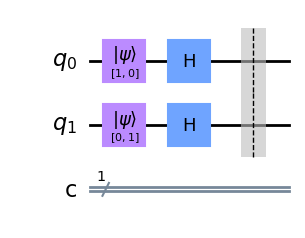

In [17]:
entry_circuit = qiskit.QuantumCircuit(2, 1) # 2 qubits and 1 classical

# Initialise qubit 0 to the state |0>
entry_circuit.initialize((1, 0), 0)

# Initialise qubit 1 to the state |1>
entry_circuit.initialize((0, 1), 1)

# Apply Hadamard gate to qubit 0 and 1,
# putting them into a superposition.
entry_circuit.h((0, 1))

entry_circuit.barrier()
entry_circuit.draw(output='mpl')

#### Exit Circuit
The purpose of the exit circuit in Deutsch's algorithms is to measure the output qubit, and then you can determine if the oracle function is balanced or constant.

Hadamard is applied to qubit 0, then it is measure, and the result is put into classical bit 0.

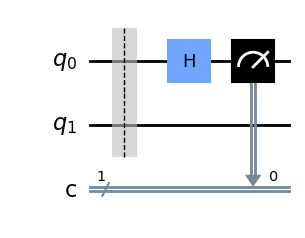

In [18]:
exit_circuit = qiskit.QuantumCircuit(2, 1)  # 2 qubits and 1 classical

exit_circuit.barrier()

# Apply Hadamard gate to qubit 0
# putting it into a superposition
exit_circuit.h(0)

exit_circuit.measure(0, 0)
exit_circuit.draw(output="mpl")

***
### Quantum Circuit Oracles
Deutsch's algorithm can be used to determine whether a function is balanced or constant. This function must be implemented as a quantum circuit; the python functions I generated earlier are not suitable and a quantum circuit must be used instead.

An oracle is another term for a black box; you can't see the internal operations of a black box, but you can pass in inputs and see its outputs, to try and determine what it is doing.

During the development of these oracles, I've used Ian McLoughlin's, `05-quantum-computing.ipynb` notebook as a reference.

***
#### Constant Zero Function

This function/circuit is constant and will always output a zero, regardless of the input.
You will find the quantum circuit below which uses the identity gate.

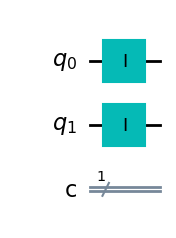

In [19]:
constant_zero_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
constant_zero_f.i((0, 1)) # Apply identity to qubits 0 and 1
constant_zero_f.draw(output="mpl")

$f$ = constant_zero_f<br>
$f$(0) = 0 and $f$(1) = 0

***
#### Constant One Function

This function/circuit is constant and will always output a one, regardless of the input.
You will find the quantum circuit below which uses the identity gate.

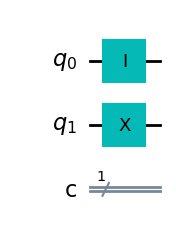

In [20]:
constant_one_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
constant_one_f.i(0) # Apply identity to qubits 0
constant_one_f.x(1) # Apply x gate to qubit 1
constant_one_f.draw(output="mpl")

***
### Balanced Identity Function

This function/circuit is balanced and will always return the input qubit.
You will find the quantum circuit below which uses the identity gate.

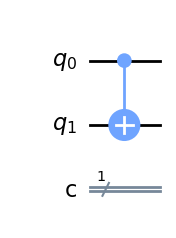

In [21]:
balanced_identity_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
balanced_identity_f.cnot(0, 1) # Apply controlled not to qubits 0 and 1
balanced_identity_f.draw(output="mpl")

$f$ = balanced_identity_f<br>
$f$(0) = 0 and $f$(1) = 1

***
### Balanced Not Function

This function/circuit is balanced and will always return the opposite of the input qubit.
You will find the quantum circuit below which uses the identity gate.

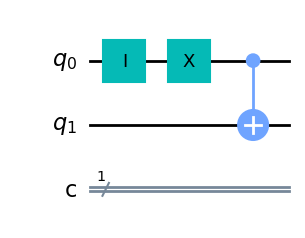

In [22]:
balanced_not_f = qiskit.QuantumCircuit(2, 1) # Two qubits, 1 classical
balanced_not_f.i(0) # Apply identity to qubit 0
balanced_not_f.x(0) # Apply Pauli X to qubit 1
balanced_not_f.cnot(0, 1) # Apply controlled not to qubits 0 and 1
balanced_not_f.draw(output="mpl")

$f$ = balanced_not_f<br>
$f$(0) = 1 and $f$(1) = 0

***
### Determining if an Oracle/Function is Balanced
Now we'll combine the entry circuit, a random oracle/function, and the exit circuit into a single circuit, run it through the simulator, and if one is returned, the oracle/function is said to be balanced; otherwise, it's constant.

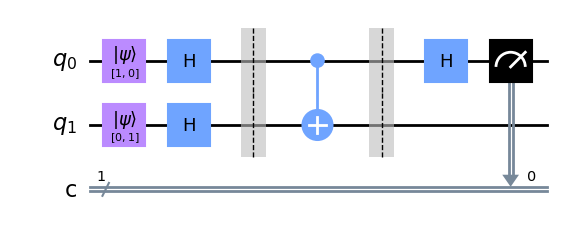

In [23]:
# List of all oracles from above
oracle_list = [
    constant_zero_f, constant_one_f,
    balanced_identity_f, balanced_not_f
]

# Pick a random from the list
random_oracle = random.choice(oracle_list)

# Adding the entry circuit, the random oracle thats either balanced or constant and the exit circuit
complete_deutsch_circuit = append_circuits([entry_circuit, random_oracle, exit_circuit])
complete_deutsch_circuit.draw(output="mpl")

In [24]:
aer_simulator = qiskit.Aer.get_backend("aer_simulator")
result = aer_simulator.run(complete_deutsch_circuit).result().get_counts()

if '1' in result: print("Balanced function")
else: print("Constant function")

Balanced function


### Testing constant_zero_f
The oracle constant_zero_f should always return constant, just a small sanity check.

In [25]:
complete_deutsch_circuit = append_circuits([entry_circuit, constant_zero_f, exit_circuit])

aer_sim = qiskit.Aer.get_backend('aer_simulator')
result = aer_sim.run(complete_deutsch_circuit).result().get_counts()

if '1' in result: print("Failure")
else: print("Works successfully")

Works successfully


***
## References
* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/05-quantum-computing.ipynb<br>
* https://quantum-computing.ibm.com/composer/docs/iqx/guide/the-qubit<br>
* https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html<br>
* https://learn.microsoft.com/en-us/azure/quantum/concepts-the-qubit<br>
* https://qutip.org/docs/latest/apidoc/classes.html#bloch-sphere<br>
* https://en.wikipedia.org/wiki/Kronecker_product<br>
* https://en.wikipedia.org/wiki/Quantum_logic_gate<br>